In [5]:
 !pip install tensorflow-gpu==2.0.0rc0

     |████████████████████████████████| 380.5MB 45kB/s 
     |████████████████████████████████| 4.3MB 41.7MB/s 
     |████████████████████████████████| 501kB 44.8MB/s 


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Counting objects: 100% (25027/25027), done.
remote: Compressing objects: 100% (25022/25022), done.
remote: Total 25027 (delta 5), reused 25020 (delta 3), pack-reused 0
Receiving objects: 100% (25027/25027), 541.62 MiB | 45.80 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [0]:
Test_data_dir = '/content/dog-cat-full-dataset/data/test'

In [0]:
Train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_size = (32,32)
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=(1.0/255.0))

In [22]:
train_gen = datagen.flow_from_directory(Train_data_dir,img_size,classes=['cats','dogs'],class_mode='binary',batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [23]:
test_gen = datagen.flow_from_directory(Test_data_dir,img_size,classes=['cats','dogs'],class_mode='binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


<h1>Build Base CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer='he_uniform',input_shape = (img_size[0],img_size[1],3)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,'relu',kernel_initializer='he_uniform'))
model.add(Dense(1,'sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss = 'binary_crossentropy',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,099,201
Trainable params: 2,099,201
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit_generator(train_gen,len(train_gen),5,validation_data=test_gen,validation_steps=len(test_gen),verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 111s 111ms/step - loss: 0.6911 - accuracy: 0.5089 - val_loss: 0.6926 - val_accuracy: 0.5004
Epoch 2/5
1000/1000 [==============================] - 112s 112ms/step - loss: 0.6866 - accuracy: 0.5308 - val_loss: 0.6844 - val_accuracy: 0.5518
Epoch 3/5
1000/1000 [==============================] - 112s 112ms/step - loss: 0.6363 - accuracy: 0.6385 - val_loss: 0.6136 - val_accuracy: 0.6618
Epoch 4/5
1000/1000 [==============================] - 112s 112ms/step - loss: 0.5759 - accuracy: 0.7002 - val_loss: 0.5724 - val_accuracy: 0.7032
Epoch 5/5
1000/1000 [==============================] - 111s 111ms/step - loss: 0.5172 - accuracy: 0.7459 - val_loss: 0.5474 - val_accuracy: 0.7170


In [31]:
history.history

{'accuracy': [0.5089, 0.5308, 0.63845, 0.70015, 0.74585],
 'loss': [0.6911076723337174,
  0.6866010786890984,
  0.6363279795348644,
  0.5759470598697662,
  0.5172056456804276],
 'val_accuracy': [0.5004, 0.5518, 0.6618, 0.7032, 0.717],
 'val_loss': [0.6926167919635773,
  0.6843891339302063,
  0.6135764982700348,
  0.5724218200445175,
  0.547441603064537]}

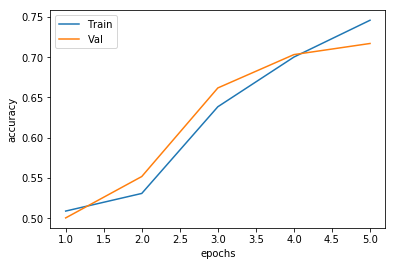

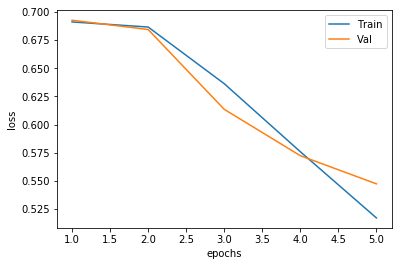

In [32]:
epoch_Range = range(1,6)
plt.plot(epoch_Range,history.history['accuracy'])
plt.plot(epoch_Range,history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()
plt.plot(epoch_Range,history.history['loss'])
plt.plot(epoch_Range,history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

<h1>Build network with batch normalisation and dropout</h1>

In [0]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer='he_uniform',input_shape = (img_size[0],img_size[1],3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1,'sigmoid'))

In [34]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss = 'binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [35]:
history = model.fit_generator(train_gen,len(train_gen),10,validation_data=test_gen,validation_steps=len(test_gen),verbose = 1)

Epoch 1/10
1000/1000 [==============================] - 214s 214ms/step - loss: 0.6820 - accuracy: 0.6015 - val_loss: 0.6343 - val_accuracy: 0.6392
Epoch 2/10
1000/1000 [==============================] - 212s 212ms/step - loss: 0.6425 - accuracy: 0.6424 - val_loss: 0.5969 - val_accuracy: 0.6742
Epoch 3/10
1000/1000 [==============================] - 213s 213ms/step - loss: 0.6167 - accuracy: 0.6636 - val_loss: 0.5853 - val_accuracy: 0.6808
Epoch 4/10
1000/1000 [==============================] - 215s 215ms/step - loss: 0.5966 - accuracy: 0.6861 - val_loss: 1.1617 - val_accuracy: 0.5418
Epoch 5/10
1000/1000 [==============================] - 225s 225ms/step - loss: 0.5775 - accuracy: 0.7027 - val_loss: 0.5340 - val_accuracy: 0.7304
Epoch 6/10
1000/1000 [==============================] - 251s 251ms/step - loss: 0.5618 - accuracy: 0.7125 - val_loss: 0.7338 - val_accuracy: 0.6140
Epoch 7/10
1000/1000 [==============================] - 246s 246ms/step - loss: 0.5463 - accuracy: 0.7247 - val_

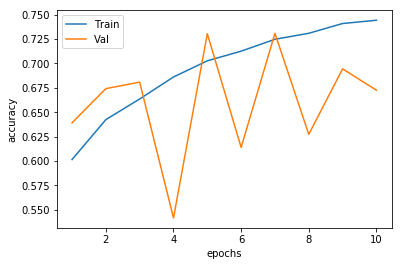

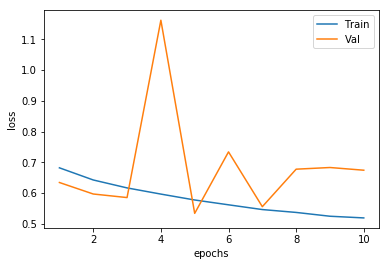

In [36]:
epoch_Range = range(1,11)
plt.plot(epoch_Range,history.history['accuracy'])
plt.plot(epoch_Range,history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()
plt.plot(epoch_Range,history.history['loss'])
plt.plot(epoch_Range,history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()